In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image


# --- MRI Data (insert your full list here) ---
mri_data = [
    {'Mouse': '3X', 'Infected': False, 'Week': 7, 'Uterus_Volume': 92600, 'Cyst_Volume': 4175, 'Cysts_to_Uterus': 4.51, 'LN_Volume': 6.90},
    {'Mouse': '3R', 'Infected': False, 'Week': 7, 'Uterus_Volume': 185800, 'Cyst_Volume': 36490, 'Cysts_to_Uterus': 19.64, 'LN_Volume': 3.54},
    {'Mouse': '3L', 'Infected': False, 'Week': 7, 'Uterus_Volume': 337200, 'Cyst_Volume': 103700, 'Cysts_to_Uterus': 30.75, 'LN_Volume': 3.05},
    {'Mouse': '3RR', 'Infected': False, 'Week': 7, 'Uterus_Volume': 128300, 'Cyst_Volume': 5762, 'Cysts_to_Uterus': 4.49, 'LN_Volume': 4.58},
    {'Mouse': '4R', 'Infected': True, 'Week': 7, 'Uterus_Volume': 91940, 'Cyst_Volume': 3735, 'Cysts_to_Uterus': 4.06, 'LN_Volume': 13.82},
    {'Mouse': '4L', 'Infected': True, 'Week': 7, 'Uterus_Volume': 95500, 'Cyst_Volume': 5212, 'Cysts_to_Uterus': 5.46, 'LN_Volume': 11.89},
    {'Mouse': '4RR', 'Infected': True, 'Week': 7, 'Uterus_Volume': 137200, 'Cyst_Volume': 31300, 'Cysts_to_Uterus': 22.81, 'LN_Volume': 9.25},
    {'Mouse': '4RL', 'Infected': True, 'Week': 7, 'Uterus_Volume': 75040, 'Cyst_Volume': 500, 'Cysts_to_Uterus': 0.67, 'LN_Volume': 10.08},
    {'Mouse': '3X', 'Infected': False, 'Week': 9, 'Uterus_Volume': 0, 'Cyst_Volume': 0, 'Cysts_to_Uterus': 0, 'LN_Volume': 5.66},
    {'Mouse': '3R', 'Infected': False, 'Week': 9, 'Uterus_Volume': 151400, 'Cyst_Volume': 24450, 'Cysts_to_Uterus': 16.15, 'LN_Volume': 3.60},
    {'Mouse': '3L', 'Infected': False, 'Week': 9, 'Uterus_Volume': 209300, 'Cyst_Volume': 75150, 'Cysts_to_Uterus': 35.91, 'LN_Volume': 4.19},
    {'Mouse': '3RR', 'Infected': False, 'Week': 9, 'Uterus_Volume': 146200, 'Cyst_Volume': 7581, 'Cysts_to_Uterus': 5.19, 'LN_Volume': 2.99},
    {'Mouse': '4R', 'Infected': True, 'Week': 9, 'Uterus_Volume': 118100, 'Cyst_Volume': 11150, 'Cysts_to_Uterus': 9.44, 'LN_Volume': 11.43},
    {'Mouse': '4L', 'Infected': True, 'Week': 9, 'Uterus_Volume': 152900, 'Cyst_Volume': 15700, 'Cysts_to_Uterus': 10.27, 'LN_Volume': 5.98},
    {'Mouse': '4RR', 'Infected': True, 'Week': 9, 'Uterus_Volume': 190000, 'Cyst_Volume': 32450, 'Cysts_to_Uterus': 17.08, 'LN_Volume': 7.46},
    {'Mouse': '4RL', 'Infected': True, 'Week': 9, 'Uterus_Volume': 84230, 'Cyst_Volume': 3735, 'Cysts_to_Uterus': 4.43, 'LN_Volume': 6.64},
    {"Mouse": "3X", 'Infected': False, 'Week': 11, "Uterus_Volume": 151900, "Cyst_Volume": 44480, "Cysts_to_Uterus": 29.28, "LN_Volume": 2.89},
    {"Mouse": "3R", 'Infected': False, 'Week': 11, "Uterus_Volume": 135900, "Cyst_Volume": 4236, "Cysts_to_Uterus": 3.12, "LN_Volume": 3.97},
    {"Mouse": "3L",'Infected': False, 'Week': 11, "Uterus_Volume": 306300, "Cyst_Volume": 92110, "Cysts_to_Uterus": 30.07, "LN_Volume": 2.99},
    {"Mouse": "3RR",'Infected': False, 'Week': 11, "Uterus_Volume": 244600, "Cyst_Volume": 20570, "Cysts_to_Uterus": 8.41, "LN_Volume": 2.36},
    {"Mouse": "4R",'Infected': True, 'Week': 11, "Uterus_Volume": 126200, "Cyst_Volume": 24340, "Cysts_to_Uterus": 19.29, "LN_Volume": 11.83},
    {"Mouse": "4L", 'Infected': True, 'Week': 11,"Uterus_Volume": 207600, "Cyst_Volume": 24790, "Cysts_to_Uterus": 11.94, "LN_Volume": 6.29},
    {"Mouse": "4RR", 'Infected': True, 'Week': 11,"Uterus_Volume": 124900, "Cyst_Volume": 26450, "Cysts_to_Uterus": 21.18, "LN_Volume": 6.78},
    {"Mouse": "4RL",'Infected': True, 'Week': 11, "Uterus_Volume": 91490, "Cyst_Volume": 1917, "Cysts_to_Uterus": 2.10, "LN_Volume": 4.48},
    {"Mouse": "3X", "Week": 13, "Infected": False, "Uterus_Volume": 109000, "Cyst_Volume": 18350, "Cysts_to_Uterus": 16.83, "LN_Volume": 5.3710},
    {"Mouse": "3R", "Week": 13, "Infected": False, "Uterus_Volume": 92130, "Cyst_Volume": 2087, "Cysts_to_Uterus": 2.27, "LN_Volume": 4.2110},
    {"Mouse": "3L", "Week": 13, "Infected": False, "Uterus_Volume": 223400, "Cyst_Volume": 30960, "Cysts_to_Uterus": 13.86, "LN_Volume": 2.9790},
    {"Mouse": "3RR", "Week": 13, "Infected": False, "Uterus_Volume": 111500, "Cyst_Volume": 6433, "Cysts_to_Uterus": 5.77, "LN_Volume": 2.2460},
    {"Mouse": "4R", "Week": 13, "Infected": True, "Uterus_Volume": 91690, "Cyst_Volume": 14270, "Cysts_to_Uterus": 15.56, "LN_Volume": 11.44},
    {"Mouse": "4L", "Week": 13, "Infected": True, "Uterus_Volume": 107900, "Cyst_Volume": 8032, "Cysts_to_Uterus": 7.44, "LN_Volume": 6.86},
    {"Mouse": "4RR", "Week": 13, "Infected": True, "Uterus_Volume": 107700, "Cyst_Volume": 21290, "Cysts_to_Uterus": 19.77, "LN_Volume": 8.62},
     {"Mouse": "3X", "Week": 15, "Infected": False, "Uterus_Volume": 188400, "Cyst_Volume": 27500, "Cysts_to_Uterus": 14.60, "LN_Volume": 5.4200},
    {"Mouse": "3R", "Week": 15, "Infected": False, "Uterus_Volume": 97610, "Cyst_Volume": 13380, "Cysts_to_Uterus": 13.71, "LN_Volume": 4.0040},
    {"Mouse": "3L", "Week": 15, "Infected": False, "Uterus_Volume": 340100, "Cyst_Volume": 116600, "Cysts_to_Uterus": 34.28, "LN_Volume": 3.2590},
    {"Mouse": "3RR", "Week": 15, "Infected": False, "Uterus_Volume": 153300, "Cyst_Volume": 29850, "Cysts_to_Uterus": 19.47, "LN_Volume": 2.3190}, 
    {"Mouse": "4R", "Week": 15, "Infected": True, "Uterus_Volume": 109400, "Cyst_Volume": 29200, "Cysts_to_Uterus": 26.69, "LN_Volume": 13.99},
    {"Mouse": "4L", "Week": 15, "Infected": True, "Uterus_Volume": 66600, "Cyst_Volume": 1941, "Cysts_to_Uterus": 2.91, "LN_Volume": 6.19},
    {"Mouse": "4RR", "Week": 15, "Infected": True, "Uterus_Volume": 138600, "Cyst_Volume": 18540, "Cysts_to_Uterus": 13.38, "LN_Volume": 7.05}
] # Use your complete MRI dataset

# === Base directory ===
base_dir = r"C:\Users\vaide\MITResearchWork\G2"
weeks = [7, 9, 11, 13, 15]
group_types = ['UninfectedFront', 'UninfectedBack', 'InfectedFront', 'InfectedBack']
variables = [
    ('Uterus_Volume', 'Uterus Volume (mm³)'),
    ('Cyst_Volume', 'Cyst Volume (mm³)'),
    ('Cysts_to_Uterus', 'Cysts/Uterus Volume (%)'),
    ('LN_Volume', 'Para-aortic LN Volume (mm³)')
]


In [15]:
slot_map = {
    7:  {'Uninfected': ['3X', '3R', '3L', '3RR', None], 'Infected': [None, '4R', '4L', '4RR', '4RL']},
    9:  {'Uninfected': ['3X', '3R', '3L', '3RR', None], 'Infected': [None, '4R', '4L', '4RR', '4RL']},
    11: {'Uninfected': ['3X', '3R', '3L', '3RR', None], 'Infected': [None, '4R', '4L', '4RR', '4RL']},
    13: {'Uninfected': ['3X', '3R', '3L', '3RR', None], 'Infected': [None, '4R', '4L', '4RR']},
    15: {'Uninfected': ['3X', '3R', '3L', '3RR', None], 'Infected': [None, '4R', '4L', '4RR', None]},
}


In [16]:
# --- Extract luminescence from 5 slots ---
def extract_luminescence(image_path, n_slots=5):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return [None] * n_slots
    height, width = img.shape
    slot_width = width // n_slots
    return [np.sum(img[:, i * slot_width:(i + 1) * slot_width]) for i in range(n_slots)]

In [17]:
# --- Find image file (prefer TIF, fallback to PNG) ---
def find_lum_image(folder):
    tif_path = os.path.join(folder, 'luminescent.TIF')
    if os.path.exists(tif_path):
        return tif_path
    for f in os.listdir(folder):
        if f.lower().endswith('.png'):
            return os.path.join(folder, f)
    return None

In [18]:
# --- Build luminescence data ---
lum_data = {}

for week in weeks:
    for status in ['Uninfected', 'Infected']:
        lum_lists = {}  # Temporary storage: mouse -> [values]

        for side in ['Front', 'Back']:
            folder = os.path.join(base_dir, f'Week{week}', f'{status}{side}')
            image_path = find_lum_image(folder)
            if not image_path:
                continue

            lum_vals = extract_luminescence(image_path)
            mouse_ids = slot_map[week][status]

            for mouse, lum in zip(mouse_ids, lum_vals):
                if mouse:
                    lum_lists.setdefault(mouse, []).append(lum)

        # Average front and back luminescence
        for mouse, lums in lum_lists.items():
            valid = [v for v in lums if v is not None]
            if valid:
                lum_data[(mouse, week)] = np.mean(valid)

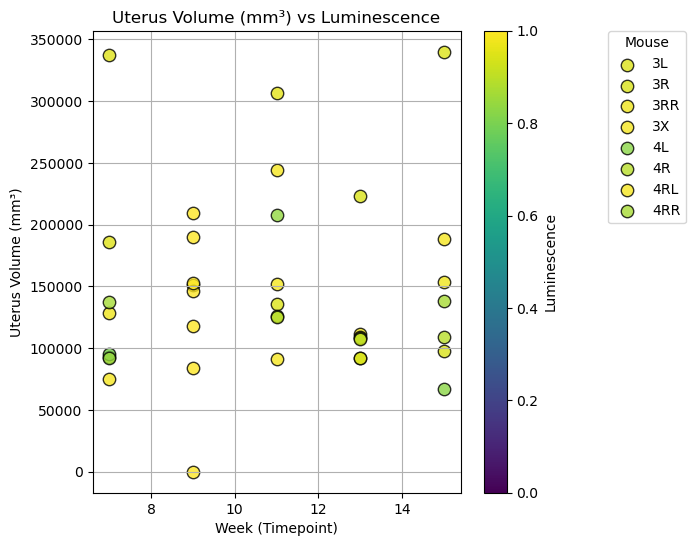

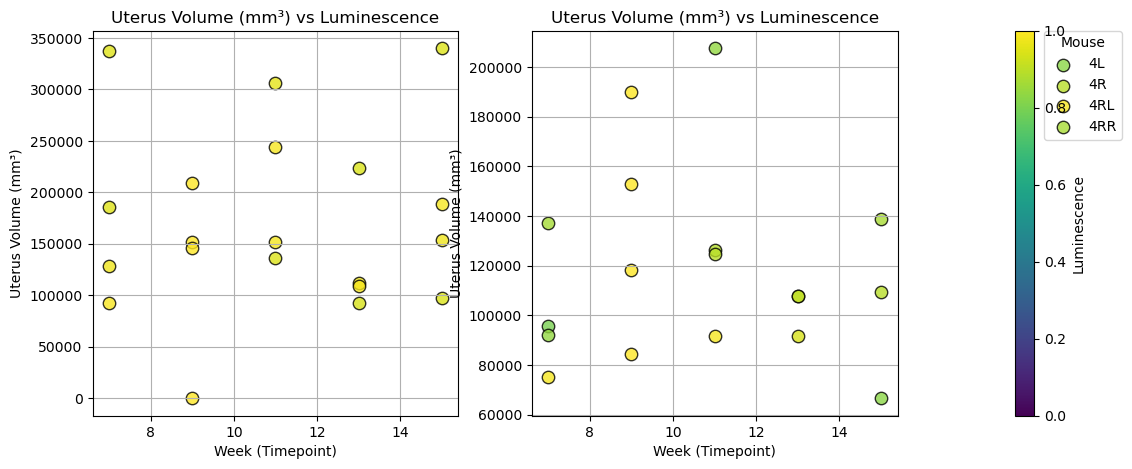

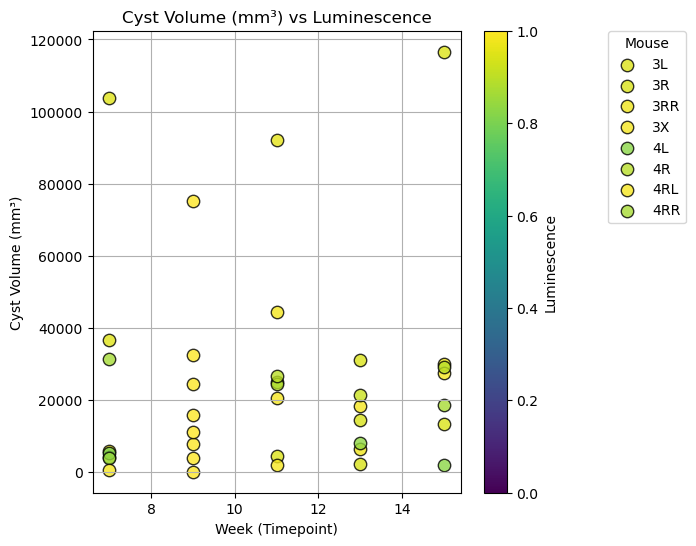

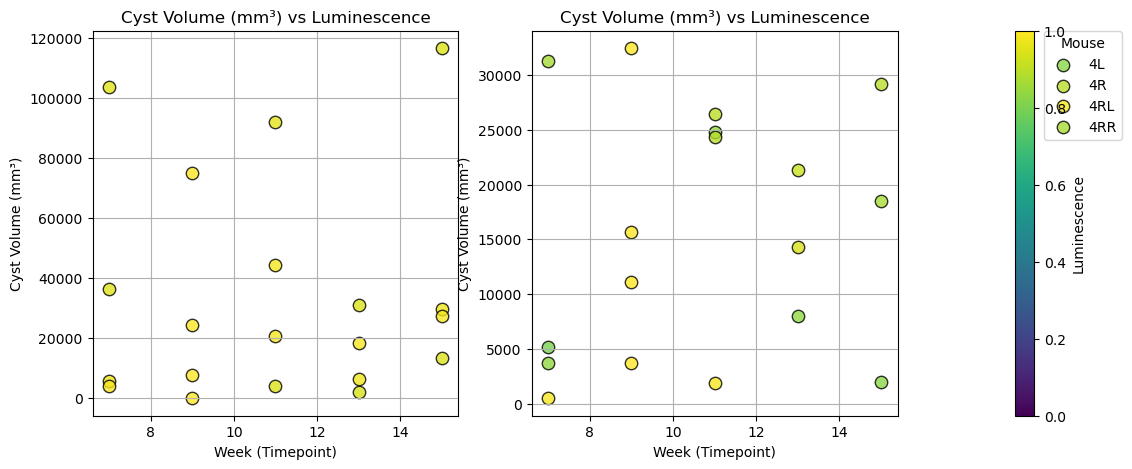

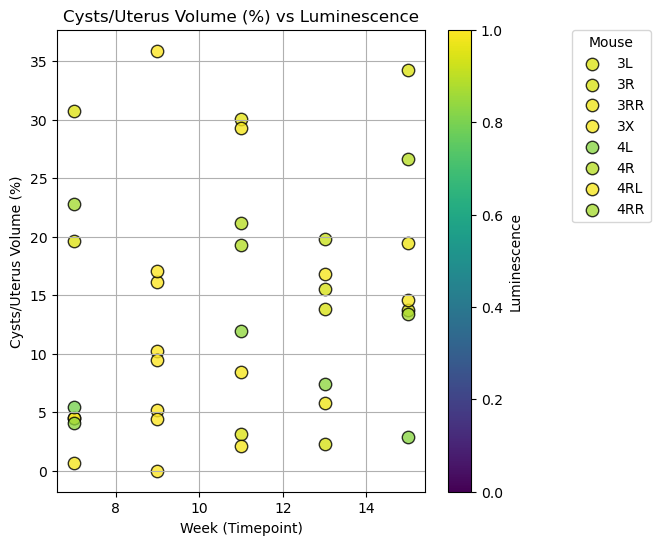

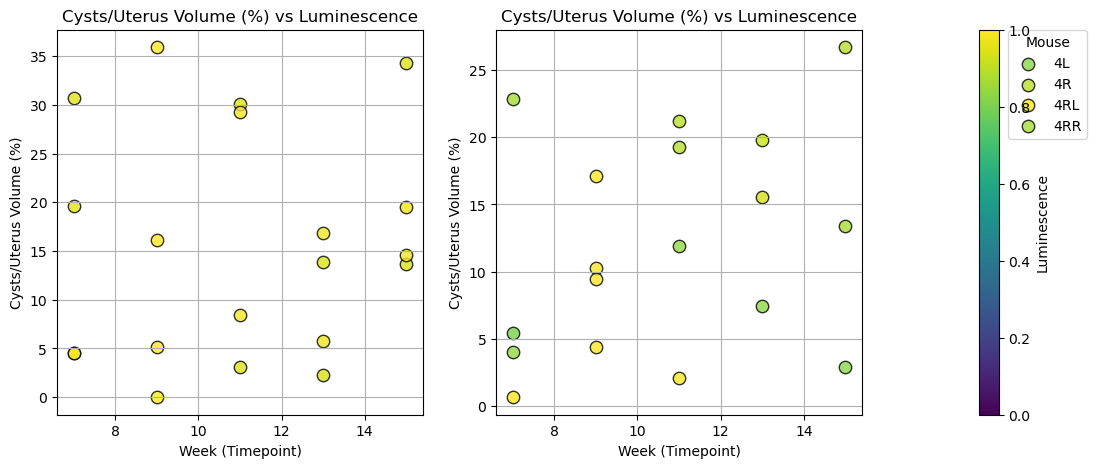

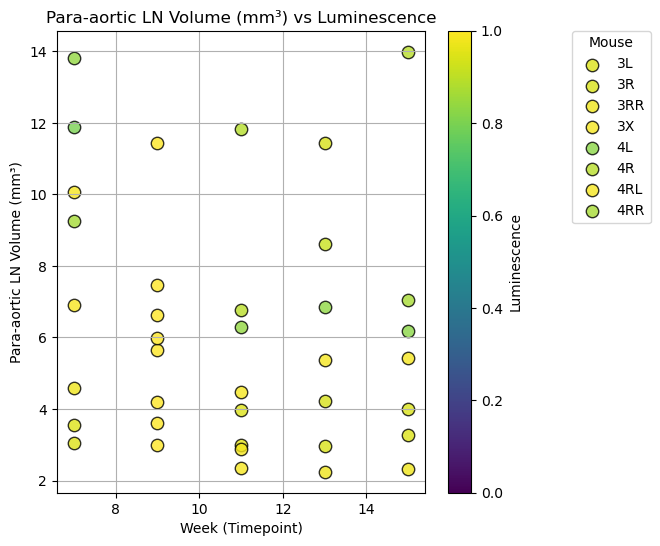

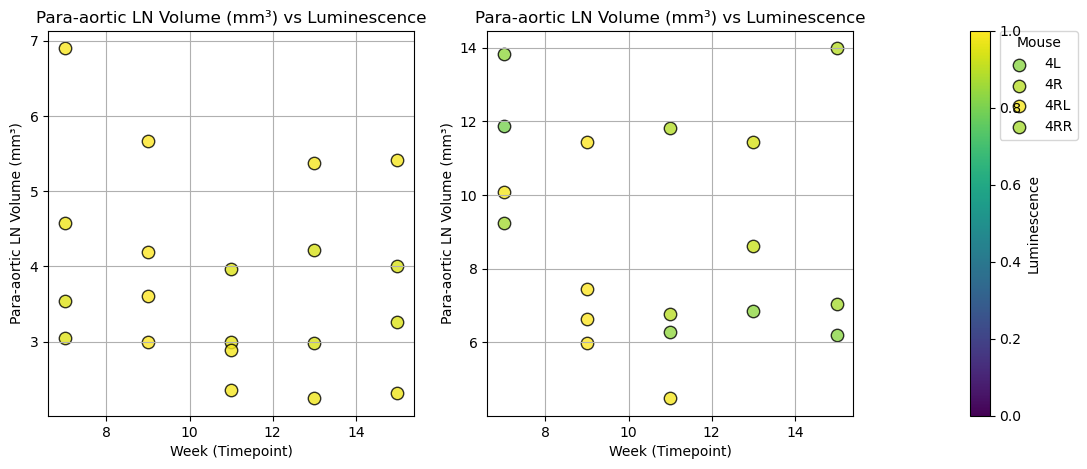

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_variable(var_key, var_label, split_by_infection=False):
    fig, axs = (plt.subplots(1, 2, figsize=(14, 5)) if split_by_infection else (plt.figure(figsize=(8, 6)), [plt.gca()]))

    def plot_group(ax, infected_status):
        cmap = cm.viridis
        for mouse in sorted(set(e['Mouse'] for e in mri_data if e['Infected'] == infected_status)):
            entries = sorted([e for e in mri_data if e['Mouse'] == mouse], key=lambda x: x['Week'])
            weeks = [e['Week'] for e in entries]
            values = [e[var_key] for e in entries]
            lums = [lum_data.get((mouse, e['Week']), None) for e in entries]

            lum_max = max([l for l in lums if l is not None], default=1)

            for w, v, lum in zip(weeks, values, lums):
                if lum is not None:
                    color = cmap(lum / lum_max)
                    ax.scatter(w, v, s=80, color=color, edgecolor="k", alpha=0.8, label=mouse)

        ax.set_xlabel("Week (Timepoint)")
        ax.set_ylabel(var_label)
        ax.set_title(f"{var_label} vs Luminescence")
        ax.grid(True)

        # --- Legend way outside ---
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(
            by_label.values(), by_label.keys(),
            title='Mouse',
            bbox_to_anchor=(1.4, 1),   # push legend far to the right
            loc='upper left',
            borderaxespad=0
        )

    if split_by_infection:
        axs[0].set_title(f"{var_label} vs Luminescence (Uninfected)")
        plot_group(axs[0], infected_status=False)

        axs[1].set_title(f"{var_label} vs Luminescence (Infected)")
        plot_group(axs[1], infected_status=True)

        # Colorbar placed next to plots
        plt.colorbar(cm.ScalarMappable(cmap=cm.viridis), ax=axs, label="Luminescence")

        # Leave big margin for legend
        plt.subplots_adjust(right=0.7)

        plt.show()
    else:
        axs[0].set_title(f"{var_label} vs Luminescence (All Mice)")
        for status in [False, True]:
            plot_group(axs[0], infected_status=status)

        plt.colorbar(cm.ScalarMappable(cmap=cm.viridis), ax=axs[0], label="Luminescence")

        plt.subplots_adjust(right=0.7)
        plt.show()


# --- Run plots ---
for var_key, var_label in variables:
    plot_variable(var_key, var_label, split_by_infection=False)  # All mice
    plot_variable(var_key, var_label, split_by_infection=True)   # Split by infection
